# **Incident Response and Resolution Tool**

---



# **1. Problem Statement**

In large organizations, incident management is a critical function that ensures service reliability and customer satisfaction. However, as the volume of incidents grows, it becomes challenging for incident response teams to efficiently prioritize which incidents to address first. Without a systematic prioritization approach, high-impact or urgent incidents might get overlooked, leading to prolonged downtimes, customer dissatisfaction, and potential revenue loss.



# **2. Project Objectives**

*   **Develop a Prioritization Scoring System**: Helps assign a numerical score to each incident, considering factors like incident age, urgency, reassignments, and reopenings.

*   **Automate Incident Ranking**: Use the scoring system to rank incidents from most to least critical, allowing response teams to focus on top-priority incidents.

*  **Improve Incident Management Efficiency**: Provide a streamlined, data-driven approach to incident prioritization, reducing response times and optimizing resource allocation.

# **3. Data Preparation and Exploration**


## **Import Libraries**

In [107]:
# Import libraries for data manipulation
import pandas as pd
import numpy as np
from datetime  import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## **Read in the data set using the code:**



In [108]:
# Import libraries
import pandas as pd

# Load the data
incident_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/incident_event_log.csv')

# Display the first few rows of the dataset
incident_data.head()

,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,?,?,?,?,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


# **Preprocessing Data**

In [109]:
# Preview Data
incident_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119998 entries, 0 to 119997
Data columns (total 36 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   number                   119998 non-null  object
 1   incident_state           119998 non-null  object
 2   active                   119998 non-null  bool  
 3   reassignment_count       119998 non-null  int64 
 4   reopen_count             119998 non-null  int64 
 5   sys_mod_count            119998 non-null  int64 
 6   made_sla                 119998 non-null  bool  
 7   caller_id                119998 non-null  object
 8   opened_by                119998 non-null  object
 9   opened_at                119998 non-null  object
 10  sys_created_by           119998 non-null  object
 11  sys_created_at           119998 non-null  object
 12  sys_updated_by           119998 non-null  object
 13  sys_updated_at           119998 non-null  object
 14  contact_type        

In [110]:
# Checking unique values in each column
incident_data.nunique()

,0
number,20769
incident_state,9
active,2
reassignment_count,28
reopen_count,9
sys_mod_count,115
made_sla,2
caller_id,4829
opened_by,157
opened_at,16349


**Observation**



*   There are 119998 non null or missing values in the data
*   The data has numerical, catagorical and boolean values
*   Number is the Incidents ID which can be dropped as it would not add any value for prioritization.
*  Columns: 'caller_id', 'opened_at' 'sys_created_at', 'sys_updated_at', 'resolved_at' contain many unique values which can be dropped except for 'opened_at' which might be useful for the prioritization tool.
*   The dataset has inconsistent values in  columns: 'rfc', 'vendor' and 'caused_by' that must be handled and dropped.







In [111]:
# Handle incosistent values
incident_data = incident_data. replace('?', np.nan)

# Verify replacements by checking values
incident_data.head()


,number,incident_state,active,reassignment_count,reopen_count,sys_mod_count,made_sla,caller_id,opened_by,opened_at,...,u_priority_confirmation,notify,problem_id,rfc,vendor,caused_by,closed_code,resolved_by,resolved_at,closed_at
0,INC0000045,New,True,0,0,0,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
1,INC0000045,Resolved,True,0,0,2,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
2,INC0000045,Resolved,True,0,0,3,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
3,INC0000045,Closed,False,0,0,4,True,Caller 2403,Opened by 8,29/2/2016 01:16,...,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 149,29/2/2016 11:29,5/3/2016 12:00
4,INC0000047,New,True,0,0,0,True,Caller 2403,Opened by 397,29/2/2016 04:40,...,False,Do Not Notify,NaN,NaN,NaN,NaN,code 5,Resolved by 81,1/3/2016 09:52,6/3/2016 10:00


## **Drop unwanted columns**

In [112]:
columns_to_drop = [
    'number', 'caller_id', 'sys_created_at', 'sys_updated_at', 'sys_created_by', 'sys_updated_by', 'location',
    'assigned_to', 'opened_by', 'resolved_by', 'knowledge', 'u_symptom', 'category', 'subcategory', 'closed_code',
    'problem_id', 'notify','contact_type', 'rfc', 'vendor', 'caused_by', 'cmdb_ci', 'assignment_group', 'closed_at'
]

# Drop these columns from the DataFrame
incident_data = incident_data.drop(columns=columns_to_drop)

# Show the remaining columns
print(incident_data.columns)

Index(['incident_state', 'active', 'reassignment_count', 'reopen_count',
       'sys_mod_count', 'made_sla', 'opened_at', 'impact', 'urgency',
       'priority', 'u_priority_confirmation', 'resolved_at'],
      dtype='object')


**Dropping Values**

We removed all the unwanted columns from our dataset that is not required for our analysis for prioritization




## **Keep relevant incident status**

In [113]:
active_incidents = incident_data[incident_data['incident_state'].isin(['New', 'Active'])]
print(active_incidents.head())

  incident_state  active  reassignment_count  reopen_count  sys_mod_count  \
0            New    True                   0             0              0   
4            New    True                   0             0              0   
5         Active    True                   1             0              1   
6         Active    True                   1             0              2   
7         Active    True                   1             0              3   

   made_sla        opened_at      impact     urgency      priority  \
0      True  29/2/2016 01:16  2 - Medium  2 - Medium  3 - Moderate   
4      True  29/2/2016 04:40  2 - Medium  2 - Medium  3 - Moderate   
5      True  29/2/2016 04:40  2 - Medium  2 - Medium  3 - Moderate   
6      True  29/2/2016 04:40  2 - Medium  2 - Medium  3 - Moderate   
7      True  29/2/2016 04:40  2 - Medium  2 - Medium  3 - Moderate   

   u_priority_confirmation      resolved_at  
0                    False  29/2/2016 11:29  
4                    Fal

We only keep incident status that are New and Active and drop the resolved, closed or any other status irrelevant for the tool

## **Datetime Format**

In [114]:
# Convert date columns to datetime format

active_incidents.loc[:, 'opened_at'] = pd.to_datetime(active_incidents['opened_at'], errors='coerce', dayfirst=True)
active_incidents.loc[:, 'resolved_at'] = pd.to_datetime(active_incidents['resolved_at'], errors='coerce', dayfirst=True)

print(active_incidents.head())


  incident_state  active  reassignment_count  reopen_count  sys_mod_count  \
0            New    True                   0             0              0   
4            New    True                   0             0              0   
5         Active    True                   1             0              1   
6         Active    True                   1             0              2   
7         Active    True                   1             0              3   

   made_sla            opened_at      impact     urgency      priority  \
0      True  2016-02-29 01:16:00  2 - Medium  2 - Medium  3 - Moderate   
4      True  2016-02-29 04:40:00  2 - Medium  2 - Medium  3 - Moderate   
5      True  2016-02-29 04:40:00  2 - Medium  2 - Medium  3 - Moderate   
6      True  2016-02-29 04:40:00  2 - Medium  2 - Medium  3 - Moderate   
7      True  2016-02-29 04:40:00  2 - Medium  2 - Medium  3 - Moderate   

   u_priority_confirmation          resolved_at  
0                    False  2016-02-29 11:

## **Standardize Categorical Values**

**Clean the priority, impact, and urgency Columns**

In [115]:
# Create a copy if active_incidents is a slice to avoid the warning
active_incidents = active_incidents.copy()

# Remove text after the number and convert columns to numeric
active_incidents[['priority', 'impact', 'urgency']] = active_incidents[['priority', 'impact', 'urgency']].apply(lambda x: x.str.split('-').str[0].astype(int))

# Verify the changes
print(active_incidents.head())


  incident_state  active  reassignment_count  reopen_count  sys_mod_count  \
0            New    True                   0             0              0   
4            New    True                   0             0              0   
5         Active    True                   1             0              1   
6         Active    True                   1             0              2   
7         Active    True                   1             0              3   

   made_sla            opened_at  impact  urgency  priority  \
0      True  2016-02-29 01:16:00       2        2         3   
4      True  2016-02-29 04:40:00       2        2         3   
5      True  2016-02-29 04:40:00       2        2         3   
6      True  2016-02-29 04:40:00       2        2         3   
7      True  2016-02-29 04:40:00       2        2         3   

   u_priority_confirmation          resolved_at  
0                    False  2016-02-29 11:29:00  
4                    False  2016-03-01 09:52:00  
5       

In [116]:
# Convert text columns to lowercase and remove extra whitespace
categorical_columns = ['incident_state', 'priority']
for col in categorical_columns:
  # Convert to string if not already
    if active_incidents[col].dtype != 'object':
        active_incidents.loc[:, col] = active_incidents[col].astype('object')

    active_incidents.loc[:, col] = active_incidents[col].astype(str).str.lower().str.strip()


# Convert categorical columns to 'category' type for memory efficiency
for col in categorical_columns:
    active_incidents.loc[:, col] = active_incidents[col].astype('category')

# Verify the changes
print(active_incidents.head())

  incident_state  active  reassignment_count  reopen_count  sys_mod_count  \
0            new    True                   0             0              0   
4            new    True                   0             0              0   
5         active    True                   1             0              1   
6         active    True                   1             0              2   
7         active    True                   1             0              3   

   made_sla            opened_at  impact  urgency priority  \
0      True  2016-02-29 01:16:00       2        2        3   
4      True  2016-02-29 04:40:00       2        2        3   
5      True  2016-02-29 04:40:00       2        2        3   
6      True  2016-02-29 04:40:00       2        2        3   
7      True  2016-02-29 04:40:00       2        2        3   

   u_priority_confirmation          resolved_at  
0                    False  2016-02-29 11:29:00  
4                    False  2016-03-01 09:52:00  
5             

## **Remove Duplicate Rows**

In [117]:
# Remove duplicate rows based on key columns
active_incidents = active_incidents.drop_duplicates(subset=['incident_state', 'opened_at'])

# Confirm no duplicate rows remain
print(active_incidents.info())


<class 'pandas.core.frame.DataFrame'>
Index: 22108 entries, 0 to 119997
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   incident_state           22108 non-null  object
 1   active                   22108 non-null  bool  
 2   reassignment_count       22108 non-null  int64 
 3   reopen_count             22108 non-null  int64 
 4   sys_mod_count            22108 non-null  int64 
 5   made_sla                 22108 non-null  bool  
 6   opened_at                22108 non-null  object
 7   impact                   22108 non-null  int64 
 8   urgency                  22108 non-null  int64 
 9   priority                 22108 non-null  object
 10  u_priority_confirmation  22108 non-null  bool  
 11  resolved_at              22104 non-null  object
dtypes: bool(3), int64(5), object(4)
memory usage: 1.7+ MB
None


# **4. Developing a prioritization scoring system**

A prioritization scoring system is a framework used to rank or prioritize tasks, incidents, or issues based on their urgency, importance, and impact. It assigns a numerical score to each item, helping decision-makers quickly determine which items need immediate attention and which can be deferred.

For an incident prioritization tool, the scoring system would analyze various attributes of each incident—such as its age (time since creation), assigned priority level, reassignments, and reopenings—and calculate a total score for each incident. Incidents with higher scores are more critical and should be addressed first.


**Understanding Key Metrics for Prioritization Score**
1. Incident resolution time: It is the time it took to resolve the incident, from opened_at to resolved_at stage.
2. Severity Levels (Priority, Impact, Urgency): These fields indicate incident criticality, they can be weighted accordingly to add context to the resolution time.
3. Reassignment count: The number of times an incident has been reassigned from one team or individual to another during its lifecycle.
A high reassignment count suggests complexity and potentially inefficient handling.
4. Reopen count: The number of times an incident has been reopened after being marked as resolved or closed. High reopen counts indicate unresolved or recurring issues, suggesting the initial resolution was insufficient.



### **Calculating Key Metrics**

**Incident Resolution Time for Resolved Incidents**

In [118]:
# Calculate 'resolution_time' as the difference between 'resolved_at' and 'opened_at' for resolved incidents
#active_incidents.loc[:, 'resolution_time'] = (active_incidents['resolved_at'] - active_incidents['opened_at']).dt.total_seconds() / 86400  # Total seconds converted to days
active_incidents.loc[:,'resolution_time'] = (active_incidents['resolved_at'] - active_incidents['opened_at']).apply(lambda x: x.total_seconds() / 86400 if pd.notna(x) else 0)

# Fill NaT (Not a Time) values with 0, assuming incidents not resolved yet have 0 resolution time
active_incidents.loc[:, 'resolution_time'] = active_incidents['resolution_time'].fillna(0)

# Preview the calculated resolution time for resolved incidents
print(active_incidents[['opened_at', 'resolved_at', 'resolution_time']].head())


              opened_at          resolved_at  resolution_time
0   2016-02-29 01:16:00  2016-02-29 11:29:00         0.425694
4   2016-02-29 04:40:00  2016-03-01 09:52:00         1.216667
5   2016-02-29 04:40:00  2016-03-01 09:52:00         1.216667
13  2016-02-29 06:10:00  2016-03-01 02:55:00         0.864583
20  2016-02-29 06:38:00  2016-03-02 12:06:00         2.227778


Calculating the age of each incident to determine how long it’s been unresolved

## **Prioritization Scoring**

**Steps for Prioritization scoring:**

1.   Set up a scoring formula or criteria based on key columns like resolution_time,
, reassignment_count, and reopen_count.
2.   Apply the Scoring Function to Each Incident.
3.   Sort Incidents by Priority Score.

**Calculating Performance Score**

Here is how this formula works:

### Performance Score = (Priority Weight ×(4 − priority)) + (Impact Weight × (4 − impact)) + (Urgency Weight × (4 − urgency)) + (Resolution Time × 0.1) + (Reassignment Count × 0.5) + (Reopen Count × 1)






In [119]:
# Define performance scoring function
def cal_performance_score(row):
    priority_weight = 2
    impact_weight = 1.5
    urgency_weight = 1

    # Convert priority, impact, and urgency to numeric if they are strings
    priority = pd.to_numeric(row['priority'], errors='coerce')
    impact = pd.to_numeric(row['impact'], errors='coerce')
    urgency = pd.to_numeric(row['urgency'], errors='coerce')

    # Calculate the Performance Score
    score = (priority_weight * (4 - priority) +
             impact_weight * (4 - impact) +
             urgency_weight * (4 - urgency) +
             row['resolution_time'] * 0.1 +
             row['reassignment_count'] * 0.5 +
             row['reopen_count'] * 1)
    return score

# Apply the scoring function with adjusted weights
active_incidents['performance_score'] = active_incidents.apply(cal_performance_score, axis=1)

# Sort and display top incidents by performance score
top_incidents = active_incidents.sort_values(by='performance_score', ascending=False)
print(top_incidents[['priority', 'impact', 'urgency', 'resolution_time', 'reassignment_count', 'reopen_count', 'performance_score']].head(10))

      priority  impact  urgency  resolution_time  reassignment_count  \
5611         3       2        2       334.177778                   0   
32855        3       2        2       325.153472                   0   
83447        3       2        2       300.857639                   0   
83448        3       2        2       300.857639                   0   
18180        3       2        2       280.375000                   0   
26236        3       2        2       273.248611                   0   
4670         3       2        2       267.106250                   0   
44540        3       2        2       267.051389                   0   
20664        3       2        2       266.911111                   0   
1015         4       2        3       296.761806                   0   

       reopen_count  performance_score  
5611              0          40.417778  
32855             0          39.515347  
83447             0          37.085764  
83448             0          37.085764  
18

## **Interpretation**


priority_weight, impact_weight, and urgency_weight: These are weights that define the importance of each metric. Higher weights indicate more influence on the final score.


**Summary**



*   Higher Scores (35+): Suggest incidents with high resolution times, indicating delayed responses or potential inefficiencies.
*   Mid-range Scores (30–35): Moderate incidents with somewhat quicker resolutions, less immediate for prioritization.
*   Low Scores (if present): Typically shorter resolution times, lower urgency.









# **5. Analyze and Visualize Performance Scores**

### **Distribution of Performance Scores: Use a histogram**

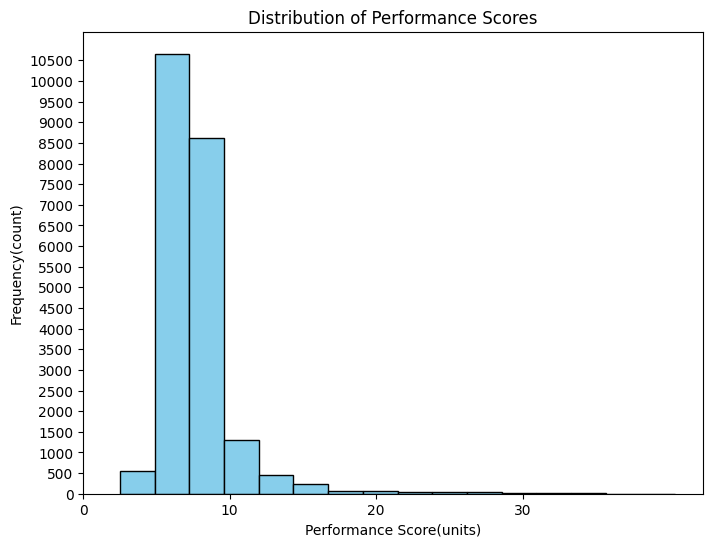

In [123]:
# Visualize Performance Score
num_bins = int(np.ceil(np.log2(len(top_incidents)) + 1))


plt.figure(figsize=(8, 6))
plt.hist(top_incidents['performance_score'].dropna(),bins=num_bins, color='skyblue', edgecolor='black')
plt.title('Distribution of Performance Scores')
plt.xlabel('Performance Score(units)')
plt.ylabel('Frequency(count)')
plt.xticks(range(0, 36, 10))
plt.yticks((range(0, 11000, 500)))
plt.show()

**Interpretation**



*   The majority of incidents have performance scores between 5 and 10, indicating that most incidents are of moderate complexity or severity.
*   Very few incidents have performance scores above 20, suggesting that extremely severe or complex incidents are rare in this dataset.
*   This skewed distribution highlights that most incidents are handled efficiently and do not escalate into high-priority, complex cases.








### **Average Performance Score by Priority Level:**

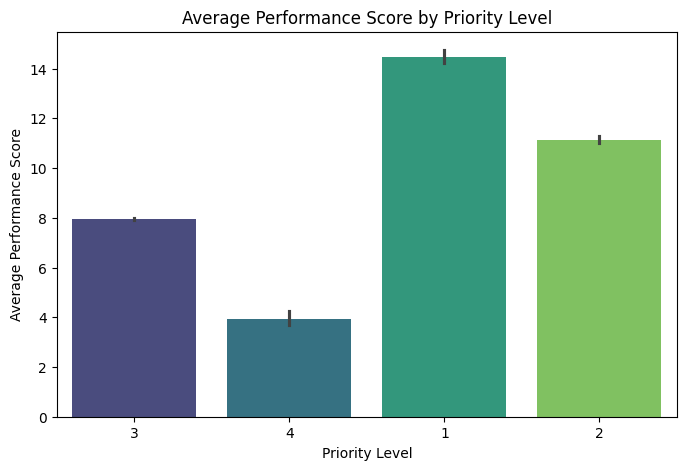

In [121]:
plt.figure(figsize=(8, 5))
sns.barplot(x='priority', y='performance_score', data=top_incidents, palette='viridis')
plt.title('Average Performance Score by Priority Level')
plt.xlabel('Priority Level')
plt.ylabel('Average Performance Score')
plt.show()


**Interpretation**



*   Incidents with Priority Level 1 have the highest average performance score, followed by Priority Level 2 and then 3.
*   This trend indicates that incidents marked with higher priority levels (e.g., Priority 1) tend to be more severe or complex, with longer resolution times and possibly more reassignment or reopening.
*   Priority Level 4 incidents have the lowest average performance score, suggesting that they are generally less complex or critical.




**Resolution Time vs. Performance Score:**

Scatter plot to show the relationship between resolution time and performance score.



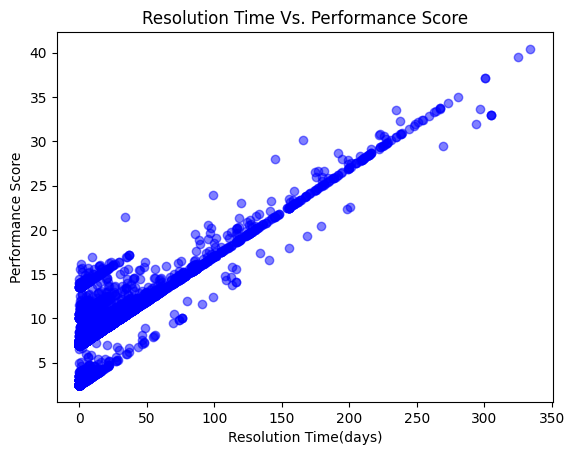

In [122]:
plt.figure(figure=(8, 5))
plt.scatter(top_incidents['resolution_time'], top_incidents['performance_score'], alpha=0.5, color='blue')
plt.title('Resolution Time Vs. Performance Score')
plt.xlabel('Resolution Time(days)')
plt.ylabel('Performance Score')
plt.show()


**Interpretation**


*   There is a positive correlation between resolution time and performance score. Incidents with longer resolution times tend to have higher performance scores.
*   As unresolved incidents or those requiring a longer time to resolve often reflect greater complexity, severity, or resource requirements, leading to higher scores.
*   The clustering of data points near lower resolution times and performance scores suggests that many incidents are resolved relatively quickly and with less complexity.




# **6. Final Thoughts**

Incident Response and Resolution Tool that uses a data-driven performance score to prioritize incidents based on factors like priority, impact, urgency, resolution time, and complexity.

Key Findings:

1.   Effective Prioritization: Higher scores accurately reflect critical and complex incidents, aligning well with priority levels.
2.   Resolution Time Correlation: Longer resolution times contribute significantly to higher scores, highlighting delays or complex cases.
3.   Efficient Distribution: Most incidents have moderate scores, suggesting effective incident management overall.

The tool enables a structured approach to incident management, ensuring that high-priority issues receive timely attention and improving overall resolution efficiency.






